<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('/datasets/insurance.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
df.head(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


In [5]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [6]:
df.duplicated().sum()

153

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

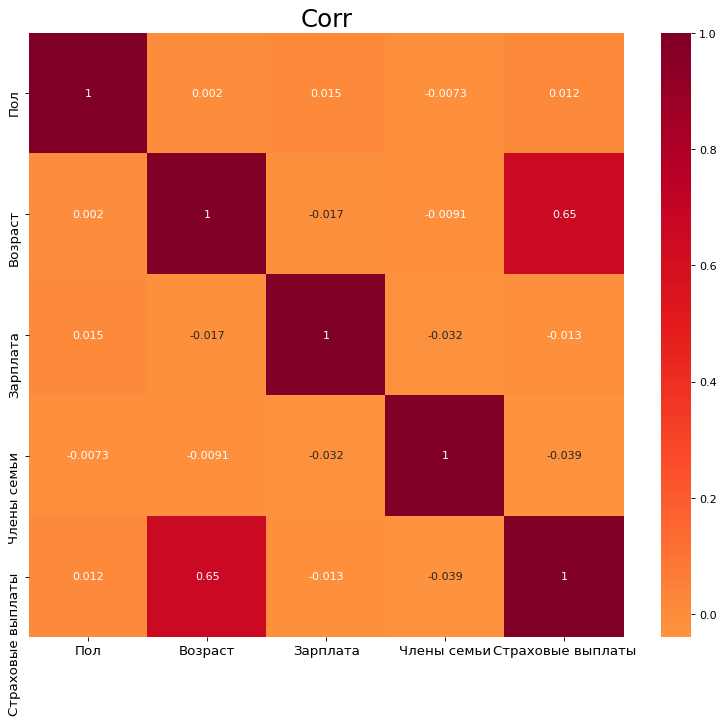

In [9]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='YlOrRd', center=0, annot=True)

# Decorations
plt.title('Corr', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


**Вывод:**

* каких то выбивающихся значений по describe мы не видим.
* данных достаточно для выполнения задания.
* Нашли дубликаты - удалили их.
* Так же обнаружили корреляцию между признаками и возрастом. 

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** `не изменяет`

**Обоснование:** 

1. Для обоснования данного вопроса нам следует параметр 𝑃  — матрица, на которую умножаются признаки умножить на параметр 𝑋  — матрица признаков и на вектор весов линейной регрессии. Тогда наша формула предсказание будет выглядеть так:
$$
a = XPw
$$
------------------------------------
2. Далее подставим наше предсказания под формулу обучения:
$$
a = XP((XP^T) XP)^{-1} XP^T y
$$
-----------------------------
3. Далее мы будем использовать формулы транспортировки матрицы они выглядят так:
$$
1. (AB)^{-1} = B^{-1}A^{-1}
$$
$$
2. (AB)^T = B^T A^T
$$
$$
3. AA^{-1} = A^{-1}A = E
$$
$$
4. AE = EA = A
$$
-------------------
4. Далее при помощи формул выше мы можем раскрыть наши скобки и получится следующее уравнение:
$$
a = XP(X^T P^T XP)^{-1}P^T X^T y
$$
-----------------
5. Далее у на есть Свойства операции умножения матриц, где есть `C(A*B)=A(B*C)` – ассоциативность умножения. При помощи её мы сможем сгруппировать наши матрицы внутри произведения. Сперва выделим 2 множителя произведения и раскроем скобки:
$
P^T X^T X и P
$

`получаем данный вид:`
$$
a = XPP^{-1}(P^T X^T X)^{-1}P^TX^Ty
$$
___________________________________
6. Выделим внутри оставшихся скобок множители и так же раскроем скобки:
$
P^T и X^T X 
$

`И будет такой вид:`
$$
a = XPP^{-1}(X^T X)^{-1}(P^T)^{-1}P^T X^Ty
$$
____________________________________
7. Далее сократим нашу матрицу на:
$
PP^{-1} и (P^T)^{-1} P^T
$
    так как дают единичные матрицы, которые можно исключить из уровнения.
`И получим такой вид:`
$$
a = X(X^T X)^{-1} X^Ty
$$
___________________________________
8. Мы пришли к нашей формуле предсказания. Тем самым обосновали наш вопрос о том что признаки умножающие на обратимую матрицу не изменяют качество линейной регрессии.

## Алгоритм преобразования

**Алгоритм**

В качестве алгоритма преобразования  используем  домножение признаков `X` на случайную обратимую матрицу `P`. Далее создадим модель и проверим метрику `R2` до преобразования. Далее умножим исходные признаки на обратимую матрицу и проверим какая получилась метрика `R2` на основе полученных значений.

**Обоснование**

Данный манёвр должен нам показать,что метрика R2 До и после преобразования должна быть равна. Тогда алгоритм будет рабочий.

## Проверка алгоритма

In [10]:
features = df.drop(['Страховые выплаты'],axis=1)
target = df['Страховые выплаты']

In [11]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0
    
model = LinearRegression()
model.fit(features, target)
R2_df = r2_score(target, model.predict(features))
print("R2 линейной регрессии ровна: ", R2_df)

R2 линейной регрессии ровна:  0.4302010044852068


In [12]:
LR = LinearRegression()
scaler = StandardScaler()
pipeline = Pipeline([("standard_scaler", scaler),("linear_regression", LR)])
pipeline.fit(features, target)
R2_scaler = r2_score(target, pipeline.predict(features))
print("R2 при масштабировании признаков равна:", R2_scaler)

R2 при масштабировании признаков равна: 0.4302010044852068


In [13]:
distrib = 0 
Rand = 0
while distrib == 0:
    Rand = np.random.normal(size=(4, 4))
    distrib = np.linalg.det(Rand)
new_df_features = features @ Rand
print(Rand)

[[-1.12053403  0.18137544  0.89987258  1.04755673]
 [-0.60345171  0.97969477  0.11676568 -2.22665201]
 [ 0.30546379  0.7365744   0.23107489  1.64215334]
 [ 1.15578385  0.63286424  0.7791453  -1.14470625]]


In [14]:
display(new_df_features.head(5))
display(new_df_features.info())

,0,1,2,3
0,15126.297877,36575.071721,11467.780752,81359.415848
1,11581.021150,28035.525836,8786.996031,62298.256272
2,6397.239560,15496.473445,4855.958809,34420.647260
3,12727.479262,30736.991593,9639.833112,68428.745229
4,7954.587823,19252.204540,6035.223834,42798.903509


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4847 non-null   float64
 1   1       4847 non-null   float64
 2   2       4847 non-null   float64
 3   3       4847 non-null   float64
dtypes: float64(4)
memory usage: 189.3 KB


None

In [15]:
target.shape

(4847,)

In [16]:
new_df_features.shape

(4847, 4)

In [17]:
model_2 = LinearRegression()
model_2.fit(new_df_features, target)
predictions = model_2.predict(new_df_features)
r2_df_code = r2_score(target, predictions)
print('R2 для признаков в умноженном состоянии равняется',r2_df_code)

R2 для признаков в умноженном состоянии равняется 0.4302010044852079


In [18]:
print(f'Линейная регрессия на преобразованных признаках в умноженном состоянии ------> {r2_df_code}')
print(f'Линейная регрессия c масштабированием ------> {R2_scaler}')
print(f'Линейная регрессия ------> {R2_df}')

Линейная регрессия на преобразованных признаках в умноженном состоянии ------> 0.4302010044852079
Линейная регрессия c масштабированием ------> 0.4302010044852068
Линейная регрессия ------> 0.4302010044852068


# Вывод


*Знакомство с данными*

* каких то выбивающихся значений по describe мы не нашли.
* данных достаточно для выполнения задания.
* Нашли дубликаты - удалили их.
* Так же обнаружили корреляцию между признаками и возрастом.

*1 обоснование*

* Мы пришли к нашей формуле предсказания умножения матрицы. Тем самым обосновали наш вопрос о том что признаки умножающие на обратимую матрицу не изменяют качество линейной регрессии.

*2 обоснование*

* В качестве алгоритма преобразования  используем  домножение признаков `X` на случайную обратимую матрицу `P`. Далее создадили модель и проверили метрику `R2` до преобразования. Далее умножим исходные признаки на обратимую матрицу и проверили метрику `R2` на основе полученных значений пришли к выводу:


 *  Линейная регрессия на преобразованных признаках в умноженном состоянии ------> 0.4302010044610194
 *  Линейная регрессия c масштабированием ------> 0.4302010044852068
 *  Линейная регрессия ------> 0.4302010044852068
 
***Метрика R2 до и после преобразования не менялась,а значит мы нашли алгоритм шифрования данных и выполнили поставленную задачу .***